<a href="https://colab.research.google.com/github/nbethala/BreastCancer-EDA/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Importing the libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder

# Load the breast cancer cvs file
df = pd.read_csv("breast_cancer_survival.csv")

#check the number of observations (rows) and features (columns) in the dataset
df.shape

# get information about the data
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Age                      2000 non-null   int64  
 2   Marital_Status           2000 non-null   object 
 3   Year of Operation        2000 non-null   int64  
 4   Positive_Axillary_Nodes  2000 non-null   int64  
 5   Tumor_Size               2000 non-null   float64
 6   Radiation_Therapy        2000 non-null   object 
 7   Chemotherapy             2000 non-null   object 
 8   Hormone_Therapy          2000 non-null   object 
 9   Survival_Status          2000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 156.4+ KB


In [37]:
# display first 5 rows of the data to view
df.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,eca1411e,36,Married,1959,3,1.7,Yes,Yes,No,2
1,63e3301c,39,Married,1966,0,1.6,Yes,No,No,2
2,01647916,71,Single,1964,3,3.1,No,No,No,2
3,07e33840,50,Married,1960,0,3.0,Yes,No,Yes,1
4,ed75da3f,44,Married,1965,4,2.6,Yes,No,No,1


In [38]:
#Display last 5 rows of the data to view
df.tail()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
1995,62a66d96,61,Married,1967,33,2.6,No,No,No,2
1996,0d6864b0,48,Married,1968,31,2.0,Yes,Yes,No,2
1997,305defee,64,Married,1961,43,2.0,Yes,No,No,2
1998,2feb56e9,52,Married,1959,51,2.2,Yes,No,No,2
1999,307791aa,60,Married,1962,33,5.0,Yes,No,No,2


# New Section

In [39]:
#Find the number of unique values using nunique( )

for column in df.columns:
 num_unique_values = df[column].nunique()
 print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Patient_ID: 2000
Number of unique values in Age: 54
Number of unique values in Marital_Status: 2
Number of unique values in Year of Operation: 12
Number of unique values in Positive_Axillary_Nodes: 52
Number of unique values in Tumor_Size: 46
Number of unique values in Radiation_Therapy: 2
Number of unique values in Chemotherapy: 2
Number of unique values in Hormone_Therapy: 2
Number of unique values in Survival_Status: 2


In [41]:
# Descriptive statistical analysis of dataset
df.describe(include="all")

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
count,2000,2000.00000,2000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,2000,NaN,2,NaN,NaN,NaN,2,2,2,NaN
top,eca1411e,NaN,Married,NaN,NaN,NaN,Yes,No,No,NaN
freq,1,NaN,1408,NaN,NaN,NaN,1604,1370,1822,NaN
mean,NaN,56.95400,NaN,1963.442000,9.667000,2.764100,NaN,NaN,NaN,1.509000
std,NaN,15.44779,NaN,3.388123,10.407366,1.321701,NaN,NaN,NaN,0.500044
min,NaN,30.00000,NaN,1958.000000,0.000000,0.500000,NaN,NaN,NaN,1.000000
25%,NaN,44.00000,NaN,1961.000000,3.000000,1.600000,NaN,NaN,NaN,1.000000
50%,NaN,57.00000,NaN,1963.000000,6.000000,2.700000,NaN,NaN,NaN,2.000000
75%,NaN,70.00000,NaN,1966.000000,13.000000,3.900000,NaN,NaN,NaN,2.000000


In [42]:
#Data cleaning process

#step 1: check for missing values
df.isnull().sum()

,0
Patient_ID,0
Age,0
Marital_Status,0
Year of Operation,0
Positive_Axillary_Nodes,0
Tumor_Size,0
Radiation_Therapy,0
Chemotherapy,0
Hormone_Therapy,0
Survival_Status,0


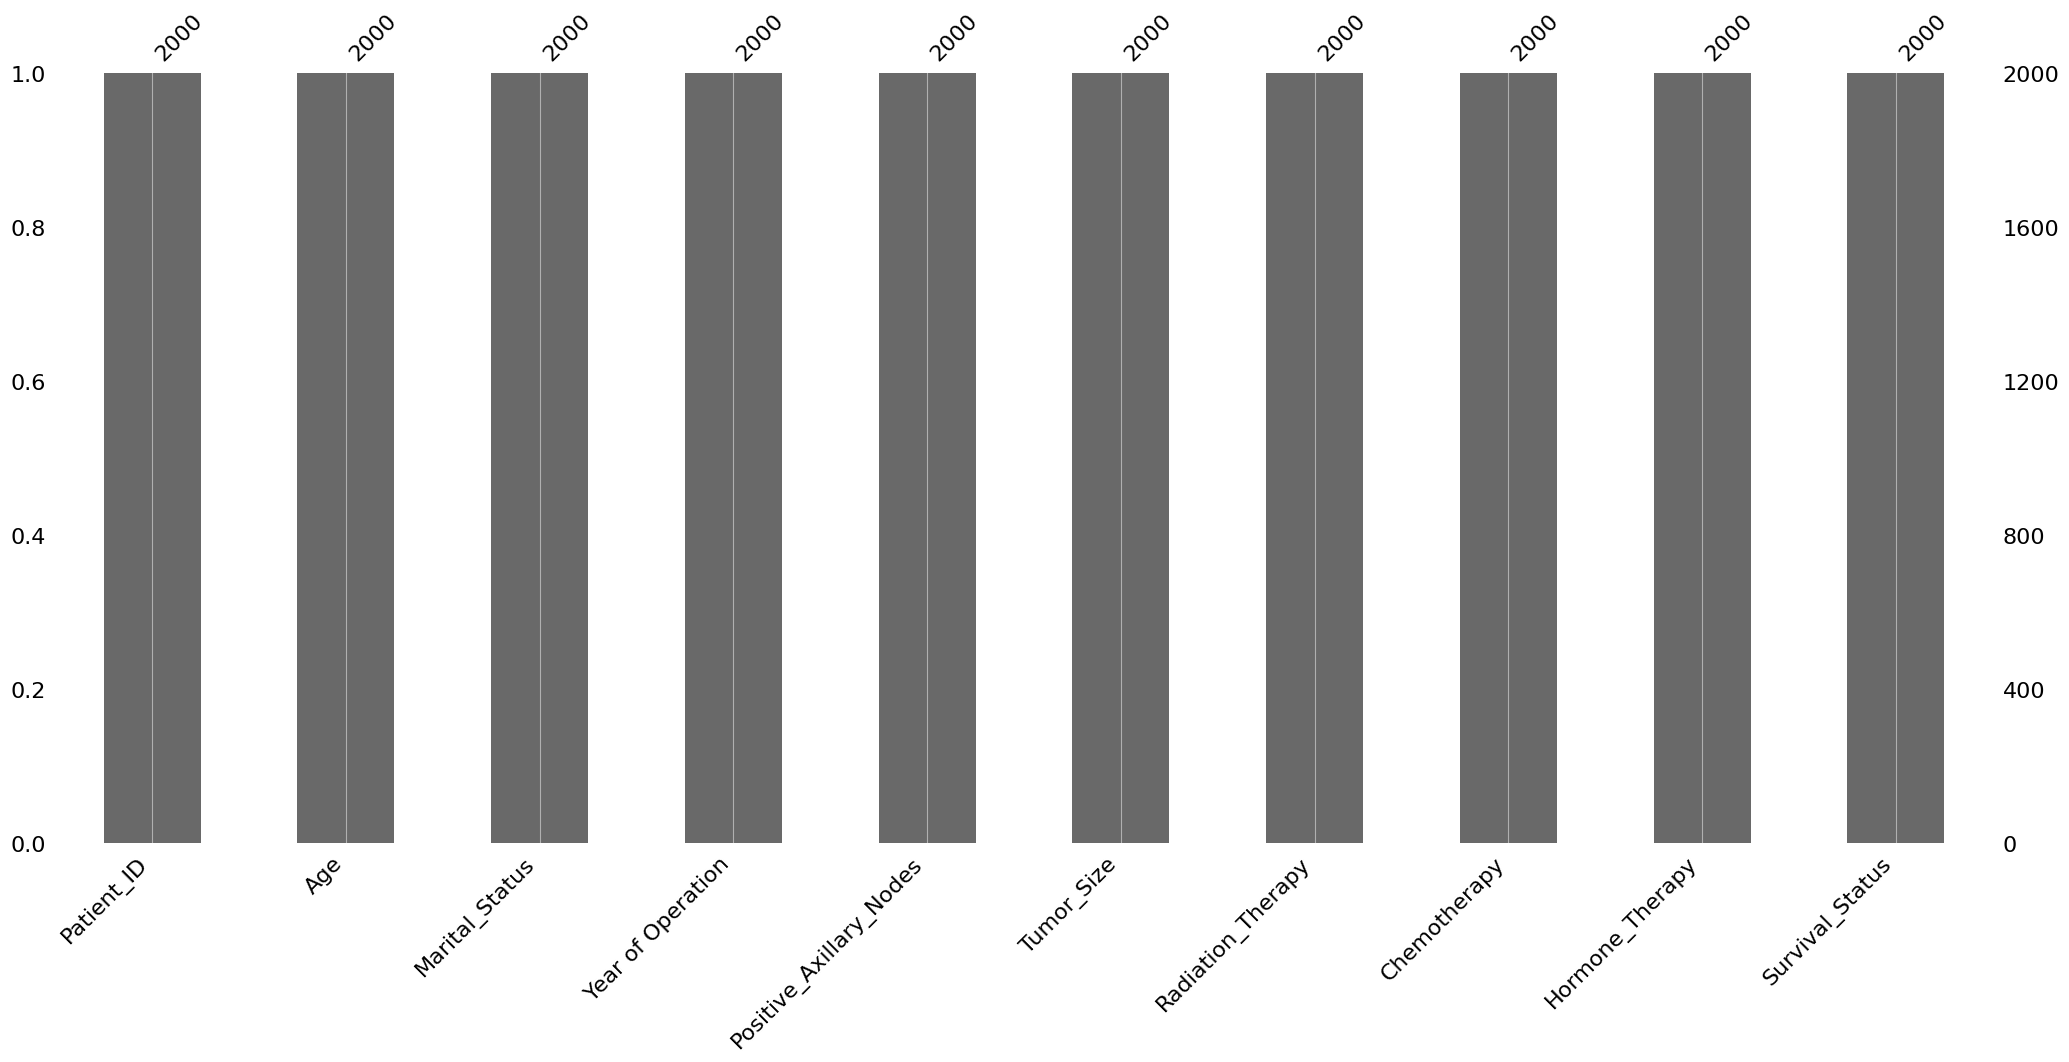

In [44]:

# visualize the columns with No null values in the dataset.
msno.bar(df)
plt.grid(True)

In [ ]:
#Removing irrelavant features as part of cleaning for example patient_ID.
df = df.drop('Patient_ID', axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      2000 non-null   int64  
 1   Marital_Status           2000 non-null   object 
 2   Year of Operation        2000 non-null   int64  
 3   Positive_Axillary_Nodes  2000 non-null   int64  
 4   Tumor_Size               2000 non-null   float64
 5   Radiation_Therapy        2000 non-null   object 
 6   Chemotherapy             2000 non-null   object 
 7   Hormone_Therapy          2000 non-null   object 
 8   Survival_Status          2000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [45]:
#Identifying duplicate rows
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Patient_ID, Age, Marital_Status, Year of Operation, Positive_Axillary_Nodes, Tumor_Size, Radiation_Therapy, Chemotherapy, Hormone_Therapy, Survival_Status]
Index: []


In [46]:
# Removing duplicate rows and updating the DataFrame
df_cleaned = df.drop_duplicates()

Text(0.5, 1.0, 'Box Plot of Positive Axillary Nodes')

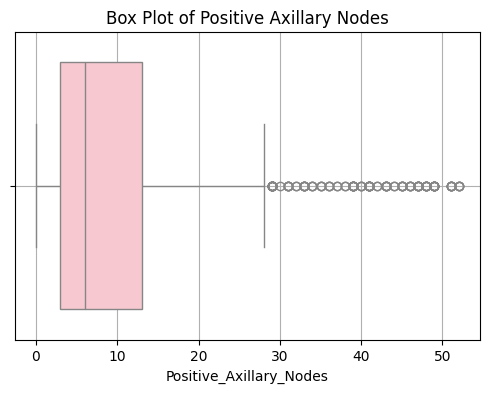

In [48]:
#Outlier detection using statistical methods
#Box Plot on Positive_Axillary_Nodes
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Positive_Axillary_Nodes'], color='pink')
plt.grid(True)
plt.title('Box Plot of Positive Axillary Nodes')

Text(0.5, 1.0, 'Box Plot of Tumor Sizes')

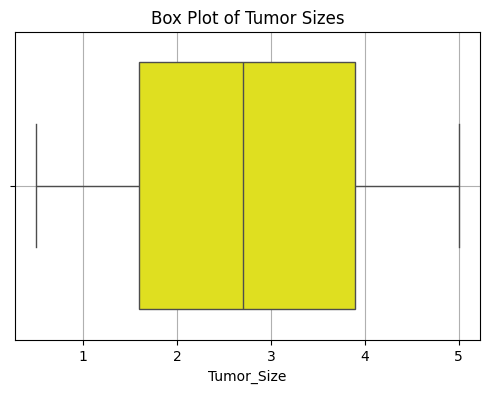

In [49]:
#Outlier detection using statistical methods
#Box Plot on Tumor Size
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Tumor_Size'], color='yellow')
plt.grid(True)
plt.title('Box Plot of Tumor Sizes')

In [51]:
# @title Default title text
# Calculate the Z-score for each data point, any points with a Z-score beyond a certain threshold
# (e.g., 3 or -3) can be considered outliers.

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])
z_scores = numeric_df.apply(zscore)
outliers = (z_scores > 3).all(axis=1)
print(z_scores)

           Age  Year of Operation  Positive_Axillary_Nodes  Tumor_Size  \
0    -1.356779          -1.311378                -0.640764   -0.805300   
1    -1.162528           0.755179                -0.929094   -0.880979   
2     0.909484           0.164734                -0.640764    0.254206   
3    -0.450274          -1.016156                -0.929094    0.178527   
4    -0.838776           0.459957                -0.544654   -0.124189   
...        ...                ...                      ...         ...   
1995  0.261980           1.050402                 2.242530   -0.124189   
1996 -0.579775           1.345624                 2.050311   -0.578263   
1997  0.456231          -0.720933                 3.203629   -0.578263   
1998 -0.320773          -1.311378                 3.972507   -0.426905   
1999  0.197230          -0.425711                 2.242530    1.692106   

      Survival_Status  
0            0.982159  
1            0.982159  
2            0.982159  
3           -1.

In [52]:
#Interquartile range(QR) to identify outliers

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the 1st (Q1) and 3rd (Q3) quartiles for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)

IQR = Q3 - Q1

# Align the dataframes before comparison
# by reindexing Q1 and Q3 to match the columns of the numeric_df
Q1 = Q1.reindex(numeric_columns.columns)
Q3 = Q3.reindex(numeric_columns.columns)

#Only compare numeric columns
outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR))).any(axis=1)
print(outliers)

0       False
1       False
2       False
3       False
4       False
        ...  
1995     True
1996     True
1997     True
1998     True
1999     True
Length: 2000, dtype: bool


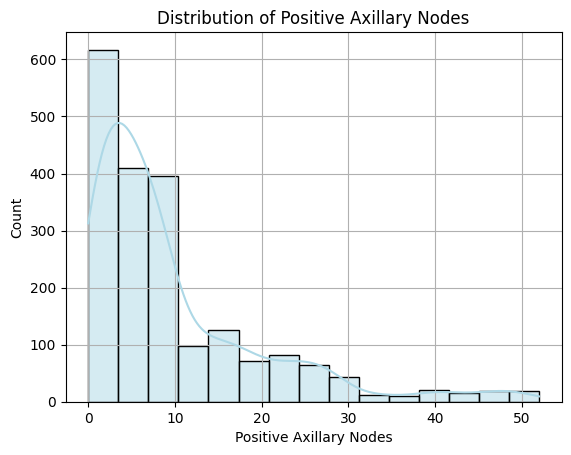

In [53]:
#Question: What is the distribution of positive axillary nodes in the patients?
sns.histplot(df['Positive_Axillary_Nodes'], bins=15, kde=True, color='lightblue')

plt.xlabel('Positive Axillary Nodes')
plt.ylabel('Count')
plt.title('Distribution of Positive Axillary Nodes')

plt.grid(True)

Smallest Tumor Size min : 0.5
Largest Tumor Size max: 5.0


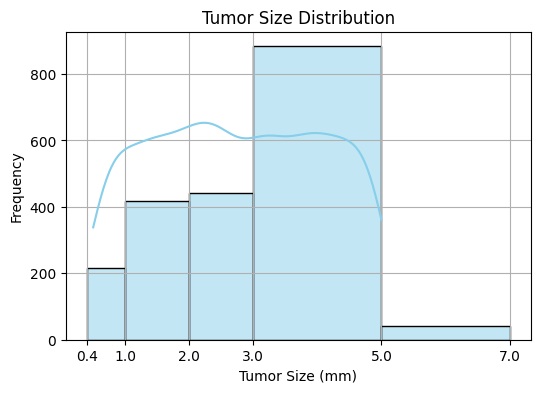

In [64]:
#Question: What is the distribution of Tumor size in the patients ?

smallest_tumor_size = df['Tumor_Size'].min()
print("Smallest Tumor Size min :", smallest_tumor_size)

largest_tumor_size = df['Tumor_Size'].max()
print("Largest Tumor Size max:", largest_tumor_size)

bins = [0.4, 1, 2, 3, 5, 7]
plt.figure(figsize=(6, 4))

sns.histplot(df['Tumor_Size'], bins=bins, kde=True, color='skyblue', edgecolor='black')

plt.xlabel('Tumor Size (mm)')
plt.ylabel('Frequency')
plt.title('Tumor Size Distribution')
plt.grid(True)
plt.xticks(bins)
plt.show()





([<matplotlib.patches.Wedge at 0x7e34157d8ad0>,
 [Text(-0.881723691239935, -0.6576954707964955, 'Married'),
  Text(0.8817236912399351, 0.6576954707964955, 'Single')],
 [Text(-0.48094019522178266, -0.3587429840708157, '70.4%'),
  Text(0.4809401952217827, 0.3587429840708157, '29.6%')])

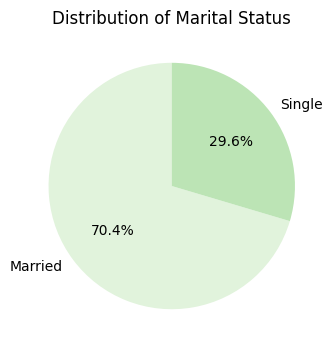

In [65]:
#Question: How is the dataset distributed across different marital statuses AND,
#what percentage of patients belong to each category?

marital_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(8, 4))
plt.title("Distribution of Marital Status")
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%',startangle=90, colors=sns.color_palette('Greens'))



In [66]:
#Categorize age column into groups
new_df = df[['Age']]
bins = [0,50,60,70,100]
labels = ['Below 50', '50-59', '60-69', 'Above 70']
new_AgeGroup_df = pd.DataFrame()
new_AgeGroup_df['Age_Group'] = pd.cut(new_df['Age'], bins=bins, labels=labels, right=False)




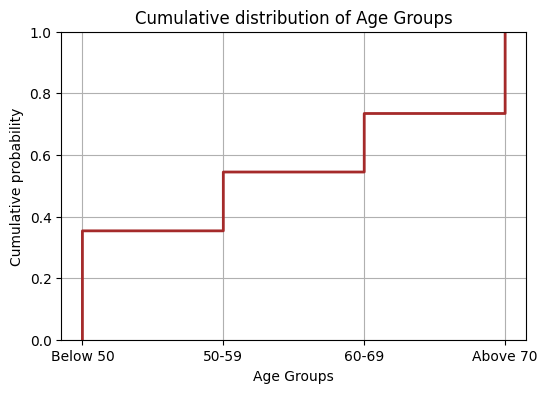

In [67]:
#Question: What is the cumulative distribution of age groups in the Cancer Survival Prediction dataset,
#and how does it illustrate the overall distribution of patients across different age groups?
plt.figure(figsize=(6, 4))
sns.ecdfplot(new_AgeGroup_df['Age_Group'], color='brown', linewidth=2)
plt.xlabel('Age Groups')
plt.ylabel('Cumulative probability')
plt.title('Cumulative distribution of Age Groups')

plt.grid(True)



In [68]:
#Bivariate and Multivariate analysis

#Data Transformation: Encode categorical features to numeric features
label_encoder = LabelEncoder()

# Convert object-type columns to numerical representations
df['Radiation_Therapy'] = label_encoder.fit_transform(df['Radiation_Therapy'])
df['Chemotherapy'] = label_encoder.fit_transform(df['Chemotherapy'])
df['Hormone_Therapy'] = label_encoder.fit_transform(df['Hormone_Therapy'])
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

Text(0.5, 1.0, 'Correlation Matrix')

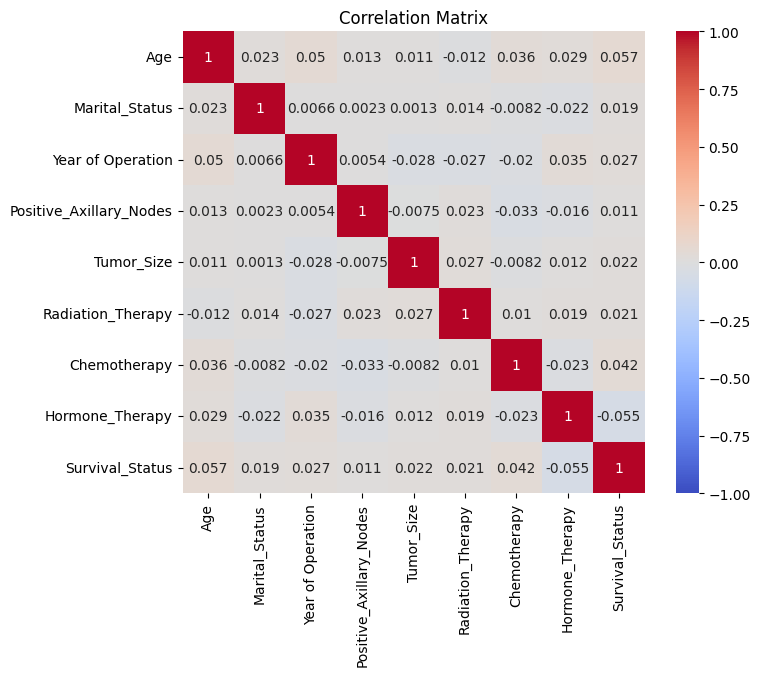

In [70]:
#Compute the correlation matrix for the dataframe-Pearson correlation coefficient

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

#Generate Heat Map:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')

In [89]:
##Question: How many patients were operated in each year for each Age group?

data = df[['Age', 'Year of Operation']]

#Binning of Age into groups
age_bins = [30,35,40,45,50,55,60,65,70,75,80,85]
labels = ["30-35","35-40","40-45","45-50","50-55","55-60","60-65","65-70","70-75","75-80","80-85"]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=labels, right=False)

# Sort the 'Age Group' column to ensure bins are in ascending order
df = df.sort_values(by='Age Group', ascending=False)

fig = px.density_heatmap(df, x="Year of Operation", y="Age Group", nbinsx=20, nbinsy=11, color_continuous_scale="Blues")

# Set square aspect ratio
fig.update_layout(
    xaxis=dict(scaleanchor="y"),  # Link x-axis and y-axis scale to make them equal
    yaxis=dict(scaleanchor="x"),   # This ensures the axes stay equal
    width=600,
    height=600
)
fig.update_layout(title_text='Bivariate Analysis Heatmap')


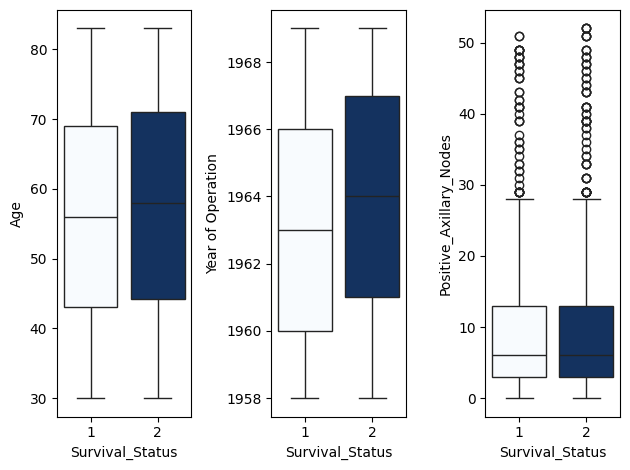

In [84]:
#Question: How does the age distribution differ between patients who survived and those who did not?

#Are there observable differences in the median age or the variability of ages based on survival outcomes?
#BoxPlot 1:
plt.subplot(1, 3, 1)
sns.boxplot(x='Survival_Status', y='Age', data=df, hue='Survival_Status', palette='Blues', legend=False)

#Question: Do trends in the year of operation vary by survival status,
#and does the boxplot reveal significant differences between survivors and non-survivors?
#BoxPlot 2:
plt.subplot(1, 3, 2)
sns.boxplot(x='Survival_Status', y='Year of Operation', data=df, hue='Survival_Status', palette='Blues', legend=False)

#Question: How does the distribution of positive axillary nodes vary between patients with different survival outcomes?
#Are there noticeable differences in the spread for survivors versus non-survivors?
#BoxPlot 3:
plt.subplot(1, 3, 3)
sns.boxplot(x='Survival_Status', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='Blues', legend=False)

plt.tight_layout()

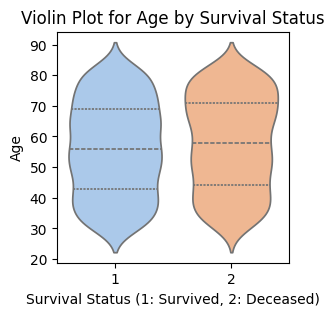

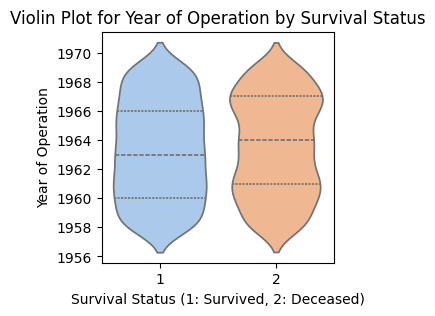

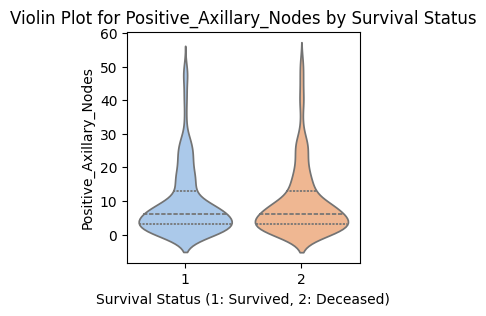

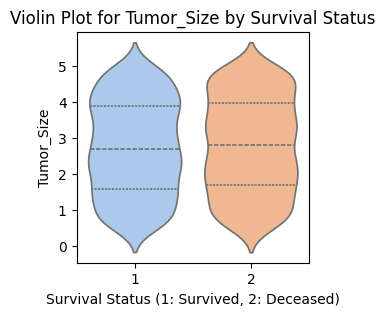

In [73]:
#Violin Plot: Compare the distribution of numerical data across multiple categories

# Features of interest
selected_features = ['Age', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size']

# Plotting for selected features
for feature in selected_features:
    plt.figure(figsize=(3, 3))
    sns.violinplot(x='Survival_Status', y=feature, data=df, hue='Survival_Status',palette='pastel', inner='quartile', legend=False)
    plt.title(f'Violin Plot for {feature} by Survival Status')
    plt.xlabel('Survival Status (1: Survived, 2: Deceased)')
    plt.ylabel(feature)
    plt.show()

<Figure size 200x200 with 0 Axes>

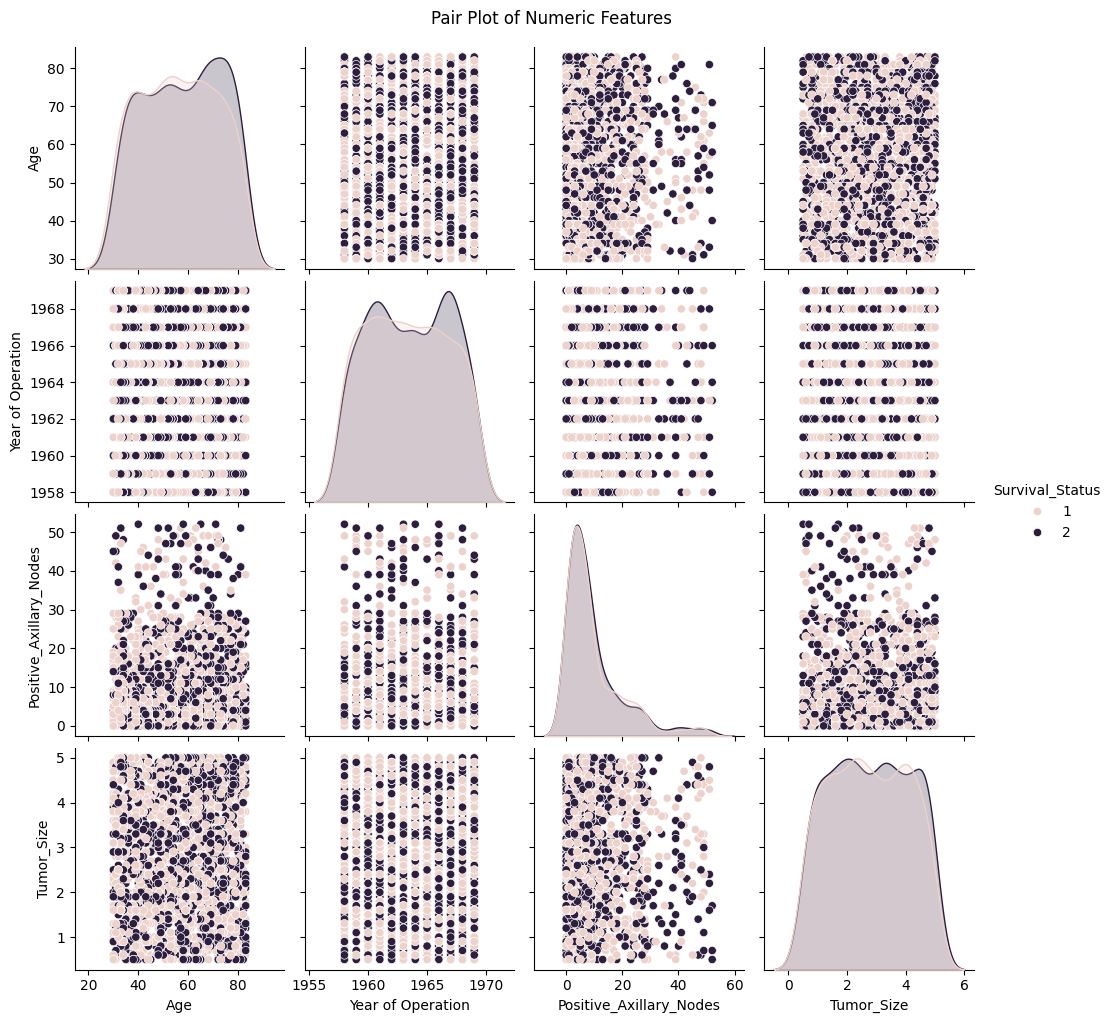

In [76]:
#Pair Plot

# Select only numeric columns
numeric_df = df[['Age', 'Year of Operation', 'Positive_Axillary_Nodes', 'Tumor_Size', 'Survival_Status']]

# Create the pair plot
plt.figure(figsize=(2, 2))

sns.pairplot(numeric_df, hue='Survival_Status')
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()



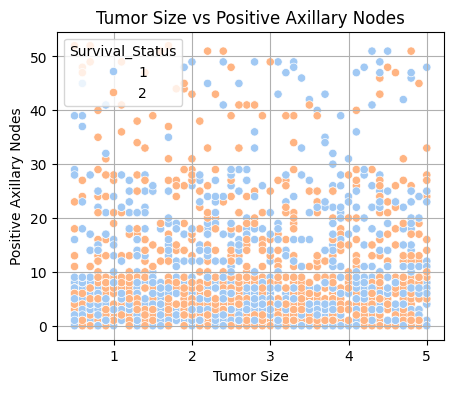

In [77]:
# Question: Is there a correlation between Tumor Size and the number of Positive Axillary Nodes?
# Scatter Plots:
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Tumor_Size', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='pastel')
plt.title('Tumor Size vs Positive Axillary Nodes')
plt.xlabel('Tumor Size')
plt.ylabel('Positive Axillary Nodes')
plt.grid(True)
plt.show()



<Figure size 300x200 with 0 Axes>

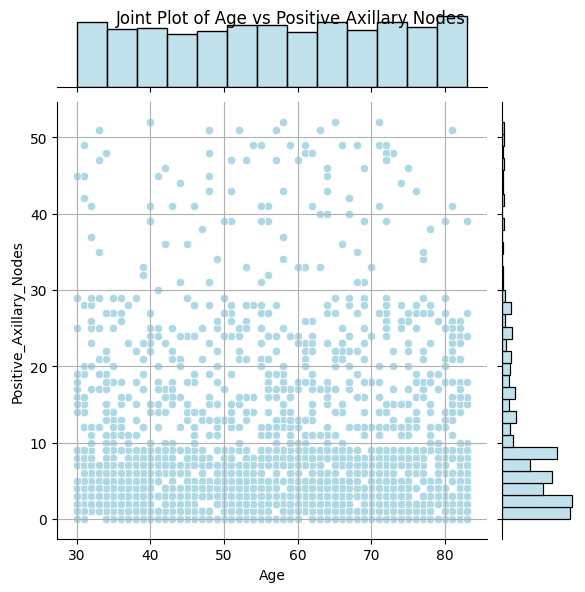

In [80]:
# Joint Plot

plt.figure(figsize=(3, 2))

sns.jointplot(x='Age', y='Positive_Axillary_Nodes', data=df,color='lightblue')
plt.suptitle('Joint Plot of Age vs Positive Axillary Nodes')
plt.grid(True)
plt.show()


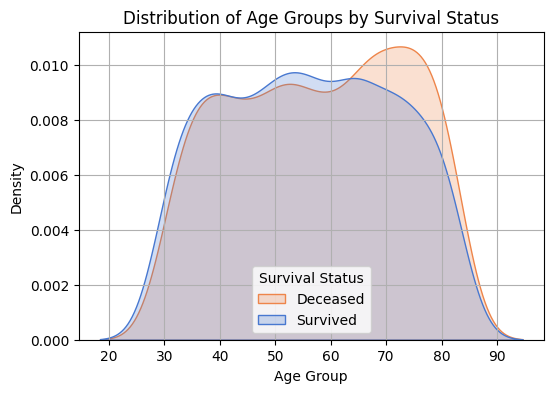

In [82]:
# Density distribution plot for Age group

data = df[['Age', 'Survival_Status']]
bins = [0,50,60,70,100]
labels = ['0-50', '50-59', '60-69', '70-100']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(6, 4))
sns.kdeplot(x='Age', hue='Survival_Status', data=df, fill=True, palette='muted')

# Add labels and title
plt.title('Distribution of Age Groups by Survival Status')
plt.xlabel('Age Group')
plt.ylabel('Density')
plt.legend(title='Survival Status', labels=['Deceased', 'Survived'])

plt.grid(True)
plt.show()

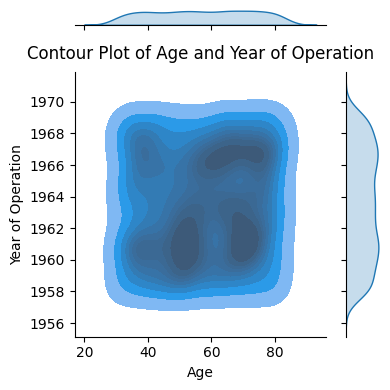

In [83]:
#Contour Plot
sns.jointplot(x = 'Age',  y = 'Year of Operation' , data = df,  kind = 'kde', fill = True, height=4)
plt.title('Contour Plot of Age and Year of Operation',y=1.02)
plt.xlabel('Age')
plt.ylabel('Year of Operation')
plt.tight_layout()

plt.show()